In [1]:
import pandas as pd
#import seaborn as sns
#import scipy
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import random
# import pybel
# from __future__ import division

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Lipinski import NumHDonors, NumHAcceptors, NumAromaticRings
import rdkit.Chem as Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Crippen import MolLogP
# from SA_Score.sascorer import scoreMolecules
from mol2vec.mol2vec.smilestovector import smilesToVec 
from gensim.models import word2vec

import sys
sys.path.append('../')

import csv
import torch

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# summarize the dataset
print(X.shape, y.shape)
print(X)

(1000, 20) (1000,)
[[-0.89483109 -1.0670149  -0.25448694 ... -0.17571721 -1.11454339
   0.36268268]
 [ 0.17028716  0.15269737 -0.39383676 ...  1.40996923 -0.63753188
   1.49974303]
 [-0.51636749  2.65981438 -1.03243014 ...  1.37199807  0.79948847
   0.88506807]
 ...
 [-0.77976473 -1.55479663  1.76729968 ...  3.49187693  0.00762306
   0.14074023]
 [ 0.47129989 -0.93171375 -0.5609986  ... -0.568612    0.24103721
   0.15164709]
 [-0.77994308  1.52251483 -1.63972576 ...  0.22623415  0.19716891
  -0.32752818]]


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -90.864 (8.096)


In [10]:
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -160


In [30]:
with open('cleaned_data.txt') as f:
    lines = f.readlines()

CNSMPO = [x.split(",")[2] for x in lines]
CNSMPO.pop(0)
CNSMPO = [float(x) for x in CNSMPO]

with open('vectors.txt') as f:
    vectors = f.readlines()

vectors = [v.split() for v in vectors]

for i, v in enumerate(vectors):
    vectors[i] = [float(x) for x in v]


tempshuffle = list(zip(vectors, CNSMPO))
random.shuffle(tempshuffle)

vectors, CNSMPO = zip(*tempshuffle)

# CNSMPO = [i/6 for i in CNSMPO]

print(len(CNSMPO), CNSMPO[0])

print(vectors[0])
print(CNSMPO[0])

8231 2.789642163642857
[1.0688788, -5.7989244, -2.6927533, 11.365307, 0.18768652, 2.1642413, -13.670146, -2.5677009, 11.01606, 6.058825, -6.3781786, 0.8044628, -12.252113, -0.64026517, -7.3262663, -1.1080976, 3.2936401, -4.916617, -6.983922, 5.3232436, 1.8726627, 6.4219394, 13.559908, 10.1162815, -9.132445, -2.3999462, -0.73640704, -13.216985, 0.22725096, 0.96104366, 15.166443, -7.3209004, -3.8814728, -6.420665, 5.267938, 3.2255466, 1.1312292, 2.0379593, 9.159296, 2.9169753, -3.924611, -1.6479473, -5.849485, -2.3473282, -12.559969, 2.807163, -0.2118391, 7.504598, -7.772626, 2.8904684, 4.376307, -9.189158, -0.63890135, -10.883531, -8.502091, -2.6314914, -5.9161286, -0.74577993, 3.7262602, 5.9827714, 1.579128, -12.049773, -3.9738538, 2.3327854, -12.397627, -0.8462063, 9.383219, -1.5194211, -2.027897, -1.3733804, -3.7089155, 4.5216246, 8.781077, -5.698447, -0.9396213, 7.970149, -5.776631, 5.237494, 0.035585396, 5.8104925, 3.1118383, 0.7100425, -8.299271, -9.039993, 2.0848985, -3.167004, -

In [6]:
vector_array = np.asarray([x for x in vectors])
CNSMPO_array = np.asarray([x for x in CNSMPO])
print(type(vector_array))
print(vector_array.shape)

<class 'numpy.ndarray'>
(8231, 300)


In [7]:
cnsmodel = RandomForestRegressor()

cnsmodel.fit(vector_array[:8000], CNSMPO_array[:8000])


RandomForestRegressor()

In [31]:
prediction = cnsmodel.predict(vector_array[0].reshape(1,-1))

print("Prediction = " + str(prediction) + ", Real = " + str(CNSMPO[0]))


Prediction = [2.78592982], Real = 2.6889142857142856


In [8]:
vectors_train = vector_array[:8000]
cnsmpo_train = CNSMPO[:8000]

vectors_test = vector_array[8001:]
cnsmpo_test = CNSMPO[8001:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = cnsmodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - cnsmpo_train[i])**2

sum_train = sum_train/len(cnsmpo_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = cnsmodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - cnsmpo_test[i])**2

sum_test = sum_test/len(cnsmpo_test)


[0.02775838]


(0.0, 6.0)

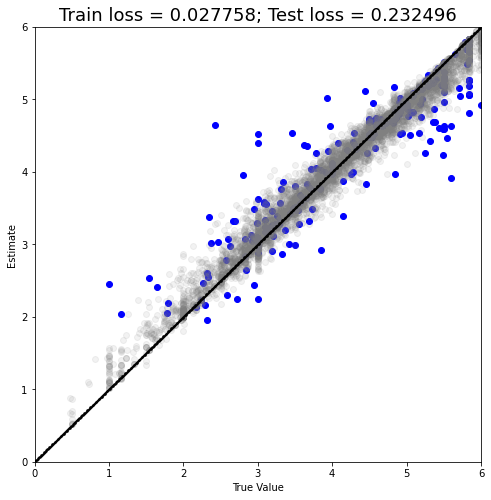

In [9]:
fig, ax = plt.subplots()

ax.scatter(cnsmpo_test, prediction_list_test, color="blue")

ax.scatter(cnsmpo_train, prediction_list, color="grey", alpha=0.1)


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + "; Test loss = " + str(round(float(sum_test),6)), fontsize=18 )

line = np.arange(0, 6, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])


In [33]:
with open('cleaned_data.txt') as f:
    lines = f.readlines()

VINA = [x.split(",")[1] for x in lines]
VINA.pop(0)
VINA = [float(x) for x in VINA]

with open('vectors.txt') as f:
    vectors = f.readlines()

vectors = [v.split() for v in vectors]

for i, v in enumerate(vectors):
    vectors[i] = [float(x) for x in v]


tempshuffle = list(zip(vectors, VINA))
random.shuffle(tempshuffle)

vectors, VINA = zip(*tempshuffle)

print(len(VINA))

# print(vectors[0])
# vectors = [vector[-28:] for vector in vectors]
print(vectors[0])

8231
[5.785048, -6.4115095, -6.15025, 5.192988, -0.13888484, -1.837833, -9.585337, -2.3529263, -1.848397, 2.2624578, -2.3310125, -2.651503, 0.1915697, 1.940101, -5.3948255, -0.4619305, 1.4402637, -5.365642, -3.1618838, 6.2742963, 3.3409169, 3.3188956, 9.141575, 6.139552, -8.147141, 2.6051595, -4.7168903, -3.8427496, -2.1009316, -3.3745463, 10.307033, -6.2068987, -6.5100346, -5.6808853, 2.254732, 0.49596506, -2.5547838, -1.6229942, 10.809162, 4.0437856, 1.0118067, -2.7220209, -0.24080387, 1.0105683, -7.020041, 3.9050143, 0.54540175, 8.118786, -4.933172, 7.5490093, 4.2971215, -4.916891, -2.7139053, -5.1546197, -9.312927, -8.113369, -4.7830443, 4.114945, 3.6880686, 4.51002, 0.21227205, -8.489644, -3.9162812, 0.14845027, -15.125116, -6.8816786, 8.360811, -0.6934172, -3.652475, -7.507791, -6.6384583, 4.561322, 10.390612, -3.3103905, -2.175357, 1.1509268, -4.7695208, 4.8890557, 2.5117307, -0.05354348, 1.8248833, -0.32972205, -3.542201, -9.5696745, 1.5652392, 2.3421824, -1.0720522, 10.444293,

In [11]:
vector_array = np.asarray([x for x in vectors])
VINA_array = np.asarray([x for x in VINA])
print(type(vector_array))
print(vector_array.shape)

<class 'numpy.ndarray'>
(8231, 300)


In [12]:
vinamodel = RandomForestRegressor()

vinamodel.fit(vector_array[:8000], VINA_array[:8000])


RandomForestRegressor()

In [13]:
vectors_train = vector_array[:8000]
vina_train = VINA[:8000]

vectors_test = vector_array[8001:]
vina_test = VINA[8001:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = vinamodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - vina_train[i])**2

sum_train = sum_train/len(vina_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = vinamodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - vina_test[i])**2

sum_test = sum_test/len(vina_test)


[0.04732598]


(-13.5, 0.0)

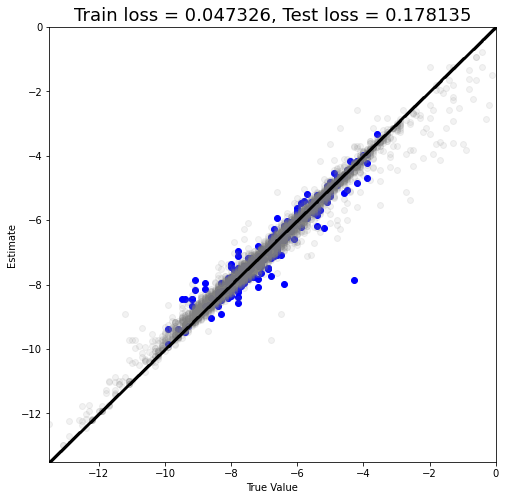

In [14]:
fig, ax = plt.subplots()

ax.scatter(vina_test, prediction_list_test, color="blue")

ax.scatter(vina_train, prediction_list, color="grey", alpha=0.1)


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + ", Test loss = " + str(round(float(sum_test),6)), fontsize=18 )

line = np.arange(-13.5, 0, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([-13.5, 0])
ax.set_ylim([-13.5, 0])


In [35]:
with open('cleaned_data_thalf.csv') as f:
    lines = f.readlines()

thalf = [x.split(",")[1] for x in lines]
thalf.pop(0)
thalf = [float(x) for x in thalf]

smiles = [x.split(",")[0] for x in lines]
smiles.pop(0)

from mol2vec.mol2vec.smilestovector import smilesToVec 
from gensim.models import word2vec

smilesToVecModel = word2vec.Word2Vec.load('mol2vec/mol2vec/models/model_300dim.pkl')

vectors = []

for s in smiles:
    vectors.append(smilesToVec(s, smilesToVecModel))

vectors = [v.tolist() for v in vectors]
vectors = [v[0] for v in vectors]

tempshuffle = list(zip(vectors, thalf))
random.shuffle(tempshuffle)

vectors, thalf = zip(*tempshuffle)

print(len(thalf))


# print(vectors[0])
# vectors = [vector[-28:] for vector in vectors]
print(vectors)

225
([1.8032920360565186, -5.837011337280273, -2.59291410446167, 4.575186729431152, 0.9826452136039734, 0.5657607913017273, -11.213067054748535, -0.5806732177734375, 6.236401557922363, -1.979008674621582, 1.0707652568817139, 2.532294273376465, -4.597834587097168, 2.787750482559204, -7.920533180236816, -2.0805253982543945, 7.843573093414307, -7.305409908294678, -7.495995044708252, 5.542356491088867, 1.9947947263717651, 7.349468231201172, 12.764055252075195, 6.795464515686035, -6.9351983070373535, 0.4456136226654053, -4.618480205535889, -12.346780776977539, 1.4230340719223022, -3.4963786602020264, 8.12387752532959, -5.310121536254883, -5.549921035766602, -5.926265239715576, 2.417154550552368, 1.9816335439682007, -1.974217414855957, -0.37688231468200684, 9.961073875427246, 4.909892559051514, -2.303616523742676, -1.040002703666687, -1.8568699359893799, -3.586390495300293, -7.78067684173584, 3.955559730529785, -0.17176279425621033, 8.26144790649414, -6.108957290649414, 4.3003315925598145, 4

In [16]:
vector_array = np.asarray([x for x in vectors])
thalf_array = np.asarray([x for x in thalf])
print(type(vector_array))
print(vector_array.shape)

<class 'numpy.ndarray'>
(225, 300)


In [17]:
thalfmodel = RandomForestRegressor()

thalfmodel.fit(vector_array[:200], thalf_array[:200])

RandomForestRegressor()

In [18]:
vectors_train = vector_array[:200]
thalf_train = thalf_array[:200]

vectors_test = vector_array[201:]
thalf_test = thalf_array[201:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = thalfmodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - thalf_train[i])**2

sum_train = sum_train/len(thalf_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = thalfmodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - thalf_test[i])**2

sum_test = sum_test/len(thalf_test)

[0.05179986]


(0.0, 4.3)

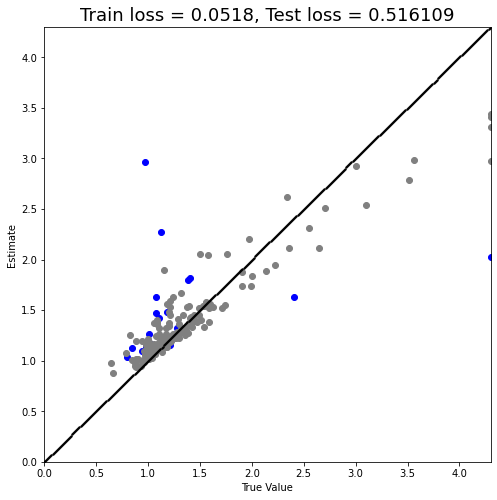

In [19]:
fig, ax = plt.subplots()

ax.scatter(thalf_test, prediction_list_test, color="blue")

ax.scatter(thalf_train, prediction_list, color="grey")


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + ", Test loss = " + str(round(float(sum_test),6)), fontsize=18 )

line = np.arange(0, 4.3, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([0, 4.3])
ax.set_ylim([0, 4.3])

LINEAR REGRESSION

<class 'numpy.ndarray'>
(8231, 300)
[0.36624052]


(0.0, 6.0)

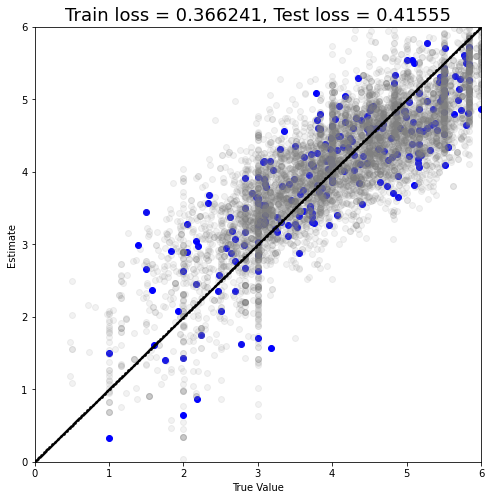

In [21]:
from sklearn.linear_model import LinearRegression

vector_array = np.asarray([x for x in vectors])
CNSMPO_array = np.asarray([x for x in CNSMPO])
print(type(vector_array))
print(vector_array.shape)

cnsmodel = LinearRegression()

cnsmodel.fit(vector_array[:8000], CNSMPO_array[:8000])

vectors_train = vector_array[:8000]
cnsmpo_train = CNSMPO[:8000]

vectors_test = vector_array[8001:]
cnsmpo_test = CNSMPO[8001:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = cnsmodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - cnsmpo_train[i])**2

sum_train = sum_train/len(cnsmpo_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = cnsmodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - cnsmpo_test[i])**2

sum_test = sum_test/len(cnsmpo_test)

fig, ax = plt.subplots()

ax.scatter(cnsmpo_test, prediction_list_test, color="blue")

ax.scatter(cnsmpo_train, prediction_list, color="grey", alpha=0.1)


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + ", Test loss = " + str(round(float(sum_test),6)), fontsize=18 )

line = np.arange(0, 6, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])

<class 'numpy.ndarray'>
(8231, 300)
[0.6986151]


(-13.5, 0.0)

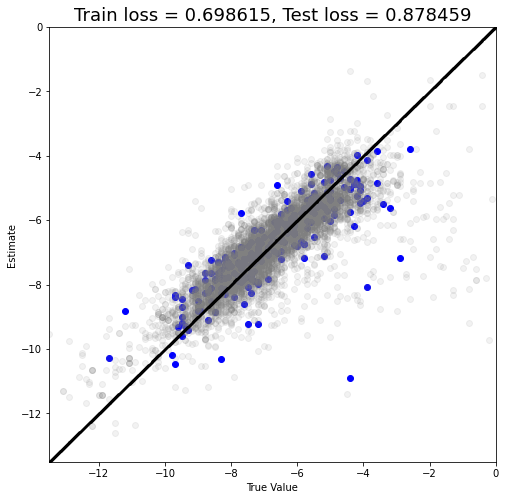

In [27]:
vector_array = np.asarray([x for x in vectors])
VINA_array = np.asarray([x for x in VINA])
print(type(vector_array))
print(vector_array.shape)

vinamodel = LinearRegression()

vinamodel.fit(vector_array[:8000], VINA_array[:8000])

vectors_train = vector_array[:8000]
vina_train = VINA[:8000]

vectors_test = vector_array[8001:]
vina_test = VINA[8001:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = vinamodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - vina_train[i])**2

sum_train = sum_train/len(vina_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = vinamodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - vina_test[i])**2

sum_test = sum_test/len(vina_test)
fig, ax = plt.subplots()

ax.scatter(vina_test, prediction_list_test, color="blue")

ax.scatter(vina_train, prediction_list, color="grey", alpha=0.1)


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + ", Test loss = " + str(round(float(sum_test),6)), fontsize=18 )

line = np.arange(-13.5, 0, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([-13.5, 0])
ax.set_ylim([-13.5, 0])

<class 'numpy.ndarray'>
(225, 300)
[0.00017314]
[array([-848109.29117648]), array([12223.57235992]), array([156754.66986783]), array([-122891.95285577]), array([2.30814418]), array([103207.901196]), array([0.88429329]), array([-179383.87002917]), array([-0.02110714]), array([1.17391154]), array([1331883.92896556]), array([-162622.20674789]), array([3915.71529352]), array([-118973.94786283]), array([0.58793651]), array([578793.71340041]), array([1.1372549]), array([-366776.43242436]), array([2.81894973]), array([675742.90745553]), array([-524450.55424303]), array([3.60081532]), array([-386164.60367184]), array([-3919.75440134])]


(0.0, 4.3)

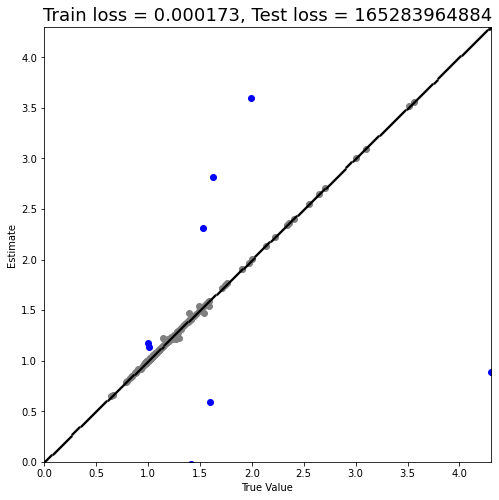

In [29]:
vector_array = np.asarray([x for x in vectors])
thalf_array = np.asarray([x for x in thalf])
print(type(vector_array))
print(vector_array.shape)

thalfmodel = LinearRegression()

thalfmodel.fit(vector_array[:200], thalf_array[:200])

vectors_train = vector_array[:200]
thalf_train = thalf_array[:200]

vectors_test = vector_array[201:]
thalf_test = thalf_array[201:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = thalfmodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - thalf_train[i])**2

sum_train = sum_train/len(thalf_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = thalfmodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - thalf_test[i])**2

print(prediction_list_test)
sum_test = sum_test/len(thalf_test)

fig, ax = plt.subplots()

ax.scatter(thalf_test, prediction_list_test, color="blue")

ax.scatter(thalf_train, prediction_list, color="grey")


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + ", Test loss = " + str(round(float(sum_test))), fontsize=18 )

line = np.arange(0, 4.3, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([0, 4.3])
ax.set_ylim([0, 4.3])

In [ ]:
DECISION TREE

<class 'numpy.ndarray'>
(8231, 300)
[8.36358305e-19]


(0.0, 6.0)

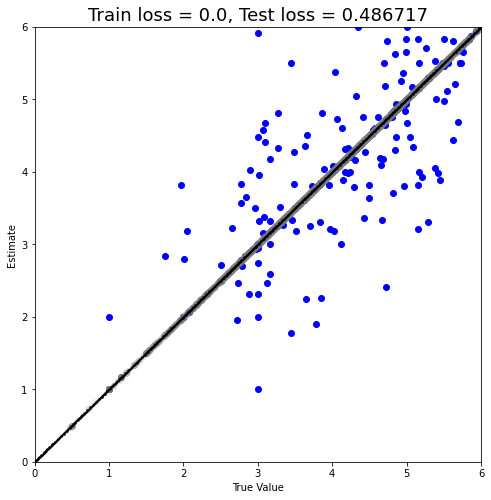

In [32]:
from sklearn.tree import DecisionTreeRegressor

vector_array = np.asarray([x for x in vectors])
CNSMPO_array = np.asarray([x for x in CNSMPO])
print(type(vector_array))
print(vector_array.shape)

cnsmodel = DecisionTreeRegressor()

cnsmodel.fit(vector_array[:8000], CNSMPO_array[:8000])

vectors_train = vector_array[:8000]
cnsmpo_train = CNSMPO[:8000]

vectors_test = vector_array[8001:]
cnsmpo_test = CNSMPO[8001:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = cnsmodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - cnsmpo_train[i])**2

sum_train = sum_train/len(cnsmpo_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = cnsmodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - cnsmpo_test[i])**2

sum_test = sum_test/len(cnsmpo_test)

fig, ax = plt.subplots()

ax.scatter(cnsmpo_test, prediction_list_test, color="blue")

ax.scatter(cnsmpo_train, prediction_list, color="grey", alpha=0.1)


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + ", Test loss = " + str(round(float(sum_test),6)), fontsize=18 )

line = np.arange(0, 6, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])

<class 'numpy.ndarray'>
(8231, 300)
[0.00931149]


(-13.5, 0.0)

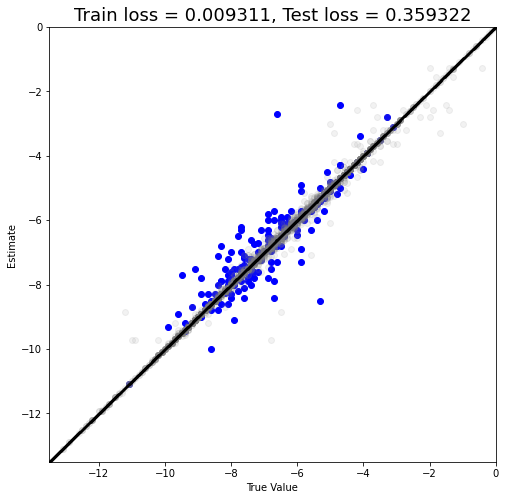

In [34]:
vector_array = np.asarray([x for x in vectors])
VINA_array = np.asarray([x for x in VINA])
print(type(vector_array))
print(vector_array.shape)

vinamodel = DecisionTreeRegressor()

vinamodel.fit(vector_array[:8000], VINA_array[:8000])

vectors_train = vector_array[:8000]
vina_train = VINA[:8000]

vectors_test = vector_array[8001:]
vina_test = VINA[8001:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = vinamodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - vina_train[i])**2

sum_train = sum_train/len(vina_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = vinamodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - vina_test[i])**2

sum_test = sum_test/len(vina_test)
fig, ax = plt.subplots()

ax.scatter(vina_test, prediction_list_test, color="blue")

ax.scatter(vina_train, prediction_list, color="grey", alpha=0.1)


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + ", Test loss = " + str(round(float(sum_test),6)), fontsize=18 )

line = np.arange(-13.5, 0, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([-13.5, 0])
ax.set_ylim([-13.5, 0])

<class 'numpy.ndarray'>
(225, 300)
[0.00020567]


(0.0, 4.3)

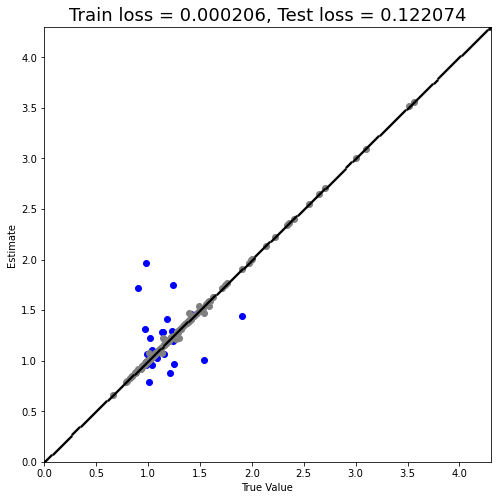

In [36]:
vector_array = np.asarray([x for x in vectors])
thalf_array = np.asarray([x for x in thalf])
print(type(vector_array))
print(vector_array.shape)

thalfmodel = DecisionTreeRegressor()

thalfmodel.fit(vector_array[:200], thalf_array[:200])

vectors_train = vector_array[:200]
thalf_train = thalf_array[:200]

vectors_test = vector_array[201:]
thalf_test = thalf_array[201:]

sum_train = 0
prediction_list = []

sum_test = 0
prediction_list_test = []

for i, v in enumerate(vectors_train):
    prediction = thalfmodel.predict(v.reshape(1,-1))
    prediction_list.append(prediction)
    sum_train = sum_train + (prediction - thalf_train[i])**2

sum_train = sum_train/len(thalf_train)


print(sum_train)

for i, v in enumerate(vectors_test):
    prediction = thalfmodel.predict(v.reshape(1,-1))
    prediction_list_test.append(prediction)
    sum_test = sum_test + (prediction - thalf_test[i])**2

sum_test = sum_test/len(thalf_test)

fig, ax = plt.subplots()

ax.scatter(thalf_test, prediction_list_test, color="blue")

ax.scatter(thalf_train, prediction_list, color="grey")


fig.set_size_inches(8, 8)

ax.set_xlabel("True Value")
ax.set_ylabel("Estimate")
ax.set_title("Train loss = " + str(round(float(sum_train),6)) + ", Test loss = " + str(round(float(sum_test),6)), fontsize=18 )

line = np.arange(0, 4.3, 0.01)

ax.scatter(line, line, color="black", s=2)
ax.set_xlim([0, 4.3])
ax.set_ylim([0, 4.3])